# Killifish example

## Preprocessing

In [12]:
# Data extracted from https://github.com/willbradshaw/killifish-igseq/tree/master/data_processed/changeo
!zcat gut-seqs-all.tsv.gz |head -n 1

SEQUENCE_ID	SEQUENCE_INPUT	FUNCTIONAL	IN_FRAME	STOP	MUTATED_INVARIANT	INDELS	VJ_CALL	VDJ_CALL	V_CALL	D_CALL	J_CALL	SEQUENCE_VDJ	SEQUENCE_IMGT	V_SEQ_START	V_SEQ_LENGTH	V_GERM_START_VDJ	V_GERM_LENGTH_VDJ	V_GERM_START_IMGT	V_GERM_LENGTH_IMGT	NP1_LENGTH	D_SEQ_START	D_SEQ_LENGTH	D_GERM_START	D_GERM_LENGTH	NP2_LENGTH	J_SEQ_START	J_SEQ_LENGTH	J_GERM_START	J_GERM_LENGTH	JUNCTION	JUNCTION_LENGTH	GERMLINE_IMGT	V_SCORE	V_IDENTITY	V_EVALUE	V_CIGAR	D_SCORE	D_IDENTITY	D_EVALUE	D_CIGAR	J_SCORE	J_IDENTITY	J_EVALUE	J_CIGAR	FWR1_IMGT	FWR2_IMGT	FWR3_IMGT	FWR4_IMGT	CDR1_IMGT	CDR2_IMGT	CDR3_IMGT	CDR3_IGBLAST	CDR3_IGBLAST_AA	CONSCOUNT	RCLUSTER	CLUSTER	BARCODE	BARCODE_COUNT	SAMPLE	REPLICATE	INDIVIDUAL	NREADS_RAW	SEX	RUN	LP	GROUP	STRAIN	CONDITION	FISH	AGE_WEEKS	DUPCOUNT	ROW	DIST_NEAREST	CLONE	GERMLINE_IMGT_D_MASK	GERMLINE_VJ_CALL	GERMLINE_VDJ_CALL	GERMLINE_V_CALL	GERMLINE_D_CALL	GERMLINE_J_CALL	BEST_VJ_CALL	BEST_VDJ_CALL	BEST_V_CALL	BEST_D_CALL	BEST_J_CALL	HAS_V	HAS_D	HAS_J	N_V	N_D	N_J	V_AMBIG	D_AMBIG	J_AMBIG

In [2]:
import pygor3 as p3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Load genomic data and create a VDJ model
fln_input_data = "gut-seqs-all.tsv.gz"
cols = ['SEQUENCE_ID', 'SEQUENCE_INPUT', 'FUNCTIONAL', 'IN_FRAME', 'STOP', 'INDELS', 'CLONE', 'CLUSTER', 'V_SEQ_START', 'J_SEQ_START', 'J_SEQ_LENGTH', 'RUN', 'FISH', 'BARCODE', 'AGE_WEEKS']
df_input = pd.read_csv(fln_input_data, sep='\t', usecols=cols)
weird_sequences_filter = df_input['SEQUENCE_INPUT'].apply(lambda x: not (len(x) - x.count('A') - x.count('C') - x.count('G') - x.count('T')) == 0 )

/home/olivares/anaconda3/envs/statbiophys-dev/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_input

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,INDELS,V_SEQ_START,J_SEQ_START,J_SEQ_LENGTH,CLUSTER,BARCODE,RUN,FISH,AGE_WEEKS,CLONE
0,1009_00020,GAATCGTCACCATGATGCTCCTGCAGAGTTTCCTTTTTCTGACTCT...,T,T,F,F,63,356.0,50.0,"B23S1,B45911S1,B8482S1","TAAGTTGGGTTACCGT,TAGATTGGGTTACCGT,TAGCTTGGGTTA...","1,1,2,2",1009,16,1009_1
1,1009_05122,GACAGGATGTTTNTGTCATCANGCATCATGTTTTCTGCTGCTCTTC...,T,T,F,F,76,368.0,51.0,B39245S1,"TCAACTTCCTTGTAAT,TGAACTTCCTTGTAAT",2,1009,16,1009_10
2,1009_00881,GACAGGATGTTTGTGTCATCAGGCATCATGTTTTCTGCTGCTCTGC...,T,T,F,F,76,368.0,51.0,"B10792S2,B2002S1,B29778S2","CGAACTGCATTGTAAT,TAAACTGCATTGTAAT,TCAACTGCATTG...","1,2",1009,16,1009_10
3,1009_00266,GCGGCAACAGACATTTGAACATGATGGACTGTAGAACAGGACTGCT...,T,T,F,F,81,370.0,54.0,B454S1,"TATCGCGCTTTGGCAT,TATCGTACTTTGGCAT,TATCGTCCTTTG...","1,2",1009,16,1009_10588
4,1009_04970,GAACCAAATCATCACCATCATGATCTCTGTAGCNCTGCTGCTGCTG...,T,T,F,F,71,379.0,47.0,B26352S1,"TCTTCTGAAATATCAT,TCTTCTGAACTATCAT","1,2",1009,16,1009_10589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,dash_05954,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,384.0,51.0,B15888S1,"TTACATAGGTTCGAGT,TTCCATAGGTTCGAGT,TTCCATATGTTC...","1,2",dash,16,dash_9846
56143,dash_05013,GACCCTCAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAG...,F,F,T,F,87,390.0,51.0,B12095S1,"TCCTATCCTTTGGGAT,TCCTATCCTTTGGGTT","1,2",dash,16,dash_9847
56144,dash_04300,CAGTGGTATCAACGCAGAGTTCTTTAAATTAAAGTCTTGGGGGCTA...,F,F,T,F,43,202.0,51.0,B9829S1,"TTCTTTAAATTAAAGA,TTCTTTAAATTAAAGT","1,2",dash,16,dash_9848
56145,dash_03202,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,384.0,51.0,B6672S1,"TCACCTGCTATAACAT,TGACATGCTATAACAT,TGACCTGCTATA...","1,2",dash,16,dash_9848


In [5]:
df_seqs = df_input.drop( df_input[weird_sequences_filter].index )
df_seqs = df_seqs.drop(df_seqs[(df_seqs['FISH'] =='dash') ].index)
df_seqs['FISH'] = df_seqs['FISH'].astype(int)
df_seqs = df_seqs[ df_seqs['J_SEQ_START'].notna() ]
df_seqs['J_SEQ_START'] = df_seqs['J_SEQ_START'].astype(int)
df_seqs['J_SEQ_LENGTH'] = df_seqs['J_SEQ_LENGTH'].astype(int)
df_seqs['nt_sequence'] = df_seqs.apply(lambda row: row['SEQUENCE_INPUT'][row['V_SEQ_START']:(row['J_SEQ_START'] + row['J_SEQ_LENGTH'])], axis=1)#.value_counts().plot(marker='o')
df_seqs

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,INDELS,V_SEQ_START,J_SEQ_START,J_SEQ_LENGTH,CLUSTER,BARCODE,RUN,FISH,AGE_WEEKS,CLONE,nt_sequence
0,1009_00020,GAATCGTCACCATGATGCTCCTGCAGAGTTTCCTTTTTCTGACTCT...,T,T,F,F,63,356,50,"B23S1,B45911S1,B8482S1","TAAGTTGGGTTACCGT,TAGATTGGGTTACCGT,TAGCTTGGGTTA...","1,1,2,2",1009,16,1009_1,GTCAGTCCCTCACCTCCTCTGAGCCAGTGGTCCACAGAGCAGGAGA...
2,1009_00881,GACAGGATGTTTGTGTCATCAGGCATCATGTTTTCTGCTGCTCTGC...,T,T,F,F,76,368,51,"B10792S2,B2002S1,B29778S2","CGAACTGCATTGTAAT,TAAACTGCATTGTAAT,TCAACTGCATTG...","1,2",1009,16,1009_10,GTGAACAGCTGACTCAGCCAGCCTCTGTGAATGTGCAGCCAGGTCA...
3,1009_00266,GCGGCAACAGACATTTGAACATGATGGACTGTAGAACAGGACTGCT...,T,T,F,F,81,370,54,B454S1,"TATCGCGCTTTGGCAT,TATCGTACTTTGGCAT,TATCGTCCTTTG...","1,2",1009,16,1009_10588,GTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTCA...
5,1009_00762,GCCTCAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGC...,T,T,F,F,85,390,56,B1641S1,"TAACATTGCGTCCAGT,TAATATTACGTCCAGT,TAATATTGAGTC...","1,2",1009,16,1009_10590,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
6,1009_00359,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,T,T,F,F,81,387,55,B636S1,"TACCCTTACATGATTT,TAGACTTACATGATTT,TAGCATTACATG...","1,2",1009,16,1009_10591,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,999_07524,ATCTGAGTGGAGAGTTGGACAGAATATCAGAGGACTCACAGTTTGA...,F,F,F,F,108,303,56,B11381S1,"TGTCATAAACTACCAT,TTTCATAAACTACCAT","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55260,999_11519,GAGAGGACTCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,F,F,81,281,51,B18419S1,"TGGGTTGGAATTAGAT,TGGTTTGGAATTAGAT","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55261,999_04643,GATATCTGAGTGGAGAGTTGGACAGAATATCAGAGGACTCACAGTT...,F,F,T,F,111,312,48,B6705S1,"TTGGATAATATAGCGT,TTGGATAATTTAGCGA,TTGGATAATTTA...","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55263,999_09072,GAGAGGACTCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,282,51,B13998S1,TGAACTCGAGTATGAT,"1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...


In [6]:
df_seqs_nf = df_seqs[ df_seqs['FUNCTIONAL'] == 'F' ]
df_seqs_nf
df_seqs_nf_06w = df_seqs_nf[df_seqs_nf['AGE_WEEKS'] == 6]
df_seqs_nf_06w
df_seqs_nf_16w = df_seqs_nf[df_seqs_nf['AGE_WEEKS'] == 16]
df_seqs_nf_16w

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,INDELS,V_SEQ_START,J_SEQ_START,J_SEQ_LENGTH,CLUSTER,BARCODE,RUN,FISH,AGE_WEEKS,CLONE,nt_sequence
46973,1009_01778,GAGAGTTGGACAGACCCTCAGAGGAATCACAGTTTGACATGATGGC...,F,F,T,F,99,406,50,B6204S1,"TAAGATCCAATCGACT,TAAGATCCGATCGACT","1,2",1009,16,1009_10348,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46974,1009_01729,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,388,50,"B5788S1,B6004S1","ATATGTATTATCGAGT,TCATGTATTATCGAGT,TTAAGTATTATC...","1,2",1009,16,1009_10348,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46975,1009_01688,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,388,50,B5562S1,"TCATATGCGATCATAT,TCATATGCGATCATGT,TCATATGCTATC...","1,2",1009,16,1009_10348,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46976,1009_01189,AGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCTG...,F,F,T,F,80,387,50,"B25416S1,B2992S1,B5986S1","TACCATAGCTTTTATT,TAGCATAGCTTTTATT,TCCCATAGCTTT...","1,2",1009,16,1009_10348,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46977,1009_01119,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,388,50,B2739S1,"TCGATTAAAGTATGGT,TCGGATAAAGTATGGT,TCGGCTAAAGTA...","1,2",1009,16,1009_10348,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,999_07524,ATCTGAGTGGAGAGTTGGACAGAATATCAGAGGACTCACAGTTTGA...,F,F,F,F,108,303,56,B11381S1,"TGTCATAAACTACCAT,TTTCATAAACTACCAT","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55260,999_11519,GAGAGGACTCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,F,F,81,281,51,B18419S1,"TGGGTTGGAATTAGAT,TGGTTTGGAATTAGAT","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55261,999_04643,GATATCTGAGTGGAGAGTTGGACAGAATATCAGAGGACTCACAGTT...,F,F,T,F,111,312,48,B6705S1,"TTGGATAATATAGCGT,TTGGATAATTTAGCGA,TTGGATAATTTA...","1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55263,999_09072,GAGAGGACTCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,F,F,T,F,81,282,51,B13998S1,TGAACTCGAGTATGAT,"1,2",999,16,NaN,GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...


In [7]:
df_seqs_f = df_seqs[ df_seqs['FUNCTIONAL'] == 'T' ]
df_seqs_f
df_seqs_f_06w = df_seqs_f[df_seqs_f['AGE_WEEKS'] == 6]
df_seqs_f_06w
df_seqs_f_16w = df_seqs_f[df_seqs_f['AGE_WEEKS'] == 16]
df_seqs_f_16w

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,INDELS,V_SEQ_START,J_SEQ_START,J_SEQ_LENGTH,CLUSTER,BARCODE,RUN,FISH,AGE_WEEKS,CLONE,nt_sequence
0,1009_00020,GAATCGTCACCATGATGCTCCTGCAGAGTTTCCTTTTTCTGACTCT...,T,T,F,F,63,356,50,"B23S1,B45911S1,B8482S1","TAAGTTGGGTTACCGT,TAGATTGGGTTACCGT,TAGCTTGGGTTA...","1,1,2,2",1009,16,1009_1,GTCAGTCCCTCACCTCCTCTGAGCCAGTGGTCCACAGAGCAGGAGA...
2,1009_00881,GACAGGATGTTTGTGTCATCAGGCATCATGTTTTCTGCTGCTCTGC...,T,T,F,F,76,368,51,"B10792S2,B2002S1,B29778S2","CGAACTGCATTGTAAT,TAAACTGCATTGTAAT,TCAACTGCATTG...","1,2",1009,16,1009_10,GTGAACAGCTGACTCAGCCAGCCTCTGTGAATGTGCAGCCAGGTCA...
3,1009_00266,GCGGCAACAGACATTTGAACATGATGGACTGTAGAACAGGACTGCT...,T,T,F,F,81,370,54,B454S1,"TATCGCGCTTTGGCAT,TATCGTACTTTGGCAT,TATCGTCCTTTG...","1,2",1009,16,1009_10588,GTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTCA...
5,1009_00762,GCCTCAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGC...,T,T,F,F,85,390,56,B1641S1,"TAACATTGCGTCCAGT,TAATATTACGTCCAGT,TAATATTGAGTC...","1,2",1009,16,1009_10590,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
6,1009_00359,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,T,T,F,F,81,387,55,B636S1,"TACCCTTACATGATTT,TAGACTTACATGATTT,TAGCATTACATG...","1,2",1009,16,1009_10591,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,999_08201,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,T,T,F,F,81,280,54,B12512S1,TGCAATTTGCTTAGGT,"1,2",999,16,NaN,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
41397,999_08197,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,T,T,F,F,81,259,33,B12508S1,"TTTCATATGATCATTT,TTTCCTATGACCATTT,TTTCCTATGATC...","1,2",999,16,NaN,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
41398,999_01019,AGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCTG...,T,T,F,F,80,273,45,B1315S1,"TCCGGTAGAATTGATT,TGAGGTAGAATTGATT,TGCGGTAGAATC...","1,2",999,16,NaN,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
41399,999_09014,GAGAGGAATCACAGTTTGACATGATGGCTCACAGAACCAGGCTGCT...,T,T,F,F,81,261,43,"B6170S1,B8041S2,B8295S1","TAAATTAACCTAAATT,TAAATTAACCTGAATT,TAGAATGAGGTA...","1,2",999,16,NaN,GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...


<AxesSubplot:>

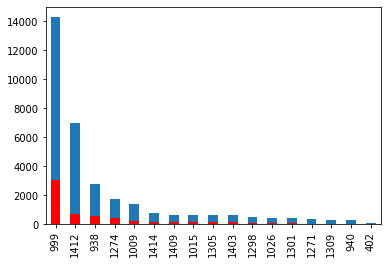

In [21]:
fig, ax = plt.subplots(sharex=True)
df_seqs_f['FISH'].value_counts().plot.bar(ax=ax)
df_seqs_nf['FISH'].value_counts().plot.bar(ax=ax, color='red')
# ax.set_yscale('log')
# ax.set_ylim(0.1, 1.5e4)

In [8]:
df_seqs_nf_16w['nt_sequence']

46973    GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46974    GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46975    GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46976    GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
46977    GTCAGACTCTGACAGAATCTGAACCAGCTGTTAGAAGACCTGGAGA...
                               ...                        
55259    GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55260    GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55261    GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55263    GCCAGACTCTGACAGAATCTGAACCAGCGGTTAGAAGACCTGGAGA...
55265    GTGAACAGCTGACTCAGCCAGCCTCTGTGAATGTGCAGCCAGGTCA...
Name: nt_sequence, Length: 4987, dtype: object

In [16]:
df_seqs_nf['FISH'].value_counts()

999     3025
1412     714
938      603
1274     440
1009     210
1414     185
1409     182
1015     167
1305     167
1403     164
1298     116
1026      65
1301      62
1271      43
1309      38
940       35
402       16
Name: FISH, dtype: int64

In [35]:
df_seqs_nf_06w['FISH'].value_counts().index.values

array([1412, 1414, 1409, 1403])

<AxesSubplot:>

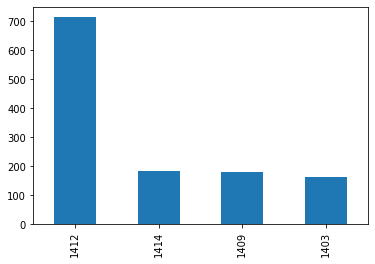

In [38]:
df_seqs_nf_06w['FISH'].value_counts().plot.bar()

In [41]:
df_seqs_nf_06w.groupby('FISH').apply(lambda g: np.unique(g['FISH']))

FISH
1403    [1403]
1409    [1409]
1412    [1412]
1414    [1414]
dtype: object

## Defining a Model from genomic templates

In [46]:
df_V_ref_genome = p3.utils.get_dataframe_from_fasta_and_csv_anchors(fln_fasta='Killifish_V_genes.fasta', fln_anchor_csv='Killifish_V_anchors.csv')
df_D_ref_genome = p3.utils.get_dataframe_from_fasta_and_csv_anchors(fln_fasta='Killifish_D_genes.fasta')
df_J_ref_genome = p3.utils.get_dataframe_from_fasta_and_csv_anchors(fln_fasta='Killifish_J_genes.fasta', fln_anchor_csv='Killifish_J_anchors.csv')

kf_mdl_0 = p3.IgorModel.make_default_VDJ(df_V_ref_genome, df_D_ref_genome, df_J_ref_genome)

,value,name,anchor_index,function
id,,,,
0,TGTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTC...,IGHV1-01*01,276,F
1,TGTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTC...,IGHV1-02*01,279,F
2,GGTCAGACACTGACTGAGTCTGAACCAGTGGTTAAAAGACCTGGAG...,IGHV2-01*01,282,F
3,TGTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTC...,IGHV1-03*01,264,F
4,AGTATTGATCTGATCCAGCCAGCCTCTAAAGCTGTGCAGCCTGGAC...,IGHV3-01*01,288,F
5,GGTCAGACTCTGACTCAGTCTGAACCAGTGGTTAAAAGACCAGGAG...,IGHV2-02*01,285,F
6,TAAACTTGATCTGAAGCAGCGCTGAAACGACCTGGAGAATCCCACA...,IGHV4-01*01,258,P
7,TGTGAACAGCTGACTCAGCCAGCCTCTGTGACTGTGCAGCCAGGTC...,IGHV1-04*01,279,F
8,TGTGAACAGCTGACTCAACCAGCCTCTGTGACTGTGCAGCCAGCTC...,IGHV1-05*01,276,F


In [ ]:
def inferring(data_group):
    fish_id = int( np.unique(data_group['FISH']) )
    nf_data = data_group['nt_sequence']
    mdl, df_likelihoods = p3.infer(nf_data, mdl=kf_mdl_0, N_iter=10)
    df_likelihoods['mean_log_Likelihood'].plot()
    mdl.plot_recombination_entropy()
    return mdl

df_fish_mdl_06w = df_seqs_nf_06w.groupby('FISH').apply(inferring)

Writing model parms in file  ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/models/model_marginals.txt
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_inferring_xpr_xh1e -batch dataIGoRhattyKIuaI -read_seqs ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaIinput_sequences.csv
/home/olivares/GitHub/statbiophys/IGoR/igor_src/igor -set_wd ./igor_inferring_xpr_xh1e -batch dataIGoRhattyKIuaI -set_genomic  --V ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/ref_genome/genomicVs.fasta --D ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/ref_genome/genomicDs.fasta --J ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_inferring_xpr_xh1e/dataIGoRhattyKIuaI_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --al

In [ ]:
df_fish_mdl_06w